# Looong

Long parameter list is a code smell - a clue that there is a problem on your software design. To help you on this this module has been written to identify methods with long parameter list and to suggest parameters groups that could became potential object because they appear together.

__Available on:__ [https://github.com/anapaulagomes/looong](https://github.com/anapaulagomes/looong)

## Goal

Given a list of methods' parameters to suggest which parameters may compose an object.

- Example:

__Django code base__

Long output:

```
Analyzed files: 553
Analyzed methods: 2224

render [django/shortcuts.py] ['request', 'template_name', 'context', 'content_type', 'status', 'using'] 6
create [django/contrib/admin/filters.py] ['field', 'request', 'params', 'model', 'model_admin', 'field_path'] 6
kml [django/contrib/gis/sitemaps/views.py] ['request', 'label', 'model', 'field_name', 'compress', 'using'] 6
run [django/core/servers/basehttp.py] ['addr', 'port', 'wsgi_handler', 'ipv6', 'threading', 'server_cls'] 6
data [django/contrib/gis/gdal/raster/band.py] ['data', 'offset', 'size', 'shape', 'as_memoryview'] 5
kmz [django/contrib/gis/sitemaps/views.py] ['request', 'label', 'model', 'field_name', 'using'] 5
dumps [django/core/signing.py] ['obj', 'key', 'salt', 'serializer', 'compress'] 5
loads [django/core/signing.py] ['s', 'key', 'salt', 'serializer', 'max_age'] 5
migrate [django/db/migrations/executor.py] ['targets', 'plan', 'state', 'fake', 'fake_initial'] 5
connect [django/db/models/signals.py] ['receiver', 'sender', 'weak', 'dispatch_uid', 'apps'] 5
```

Goal:

```
Correlated parameters and possible objects:

(request, model)
(request, model, using)
(model, label)
```

In [22]:
%matplotlib inline

parameters_lists = [['request', 'template_name', 'context', 'content_type', 'status', 'using'],
['field', 'request', 'params', 'model', 'model_admin', 'field_path'],
['request', 'label', 'model', 'field_name', 'compress', 'using'],
['addr', 'port', 'wsgi_handler', 'ipv6', 'threading', 'server_cls'],
['data', 'offset', 'size', 'shape', 'as_memoryview'],
['request', 'label', 'model', 'field_name', 'using'],
['obj', 'key', 'salt', 'serializer', 'compress'],
['s', 'key', 'salt', 'serializer', 'max_age'],
['targets', 'plan', 'state', 'fake', 'fake_initial'],
['receiver', 'sender', 'weak', 'dispatch_uid', 'apps']]

unique_parameters = set([parameter for parameters_list in parameters_lists for parameter in parameters_list]) #41 parameters, 54 total
parameters_frequency = []

for parameters_list in parameters_lists:
    parameters_frequency_row = []
    for parameter in unique_parameters:
        if parameter in parameters_list: 
            parameters_frequency_row.append(1)
        else:
            parameters_frequency_row.append(0)
    parameters_frequency.append(parameters_frequency_row)

In [23]:
import pandas as pd

parameters = pd.DataFrame(parameters_frequency, columns=unique_parameters)
parameters.head()

,ipv6,field_path,fake,weak,sender,shape,receiver,key,apps,content_type,...,dispatch_uid,s,request,model_admin,server_cls,serializer,targets,status,params,state
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


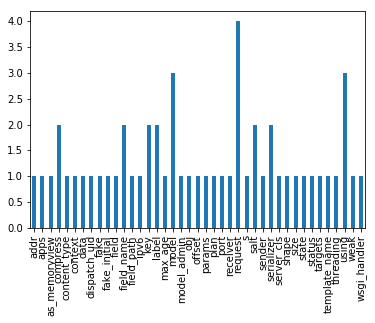

In [25]:
parameter_support_dict = {}
for column in parameters.columns:
    parameter_support_dict[column] = sum(parameters[column] > 0)
    
pd.Series(parameter_support_dict).plot(kind="bar")

References and ideas:

- fp-growth
- orange data mining
- graph
- [market basket](https://dzenanhamzic.com/2017/01/19/market-basket-analysis-mining-frequent-pairs-in-python/0